# Packages

In [9]:
# Run this cell before continuing.
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(broom)
library(digest)
library(testthat)
library(dplyr)


# Loading Dataset

In [11]:
mxmh_survey_results <- read_csv("mxmh_survey_results.csv")
head(mxmh_survey_results)
shape <- dim(mxmh_survey_results)
shape

Rows: 736 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (26): Timestamp, Primary streaming service, While working, Instrumentali...
dbl  (7): Age, Hours per day, BPM, Anxiety, Depression, Insomnia, OCD

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,⋯,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
8/27/2022 19:29:02,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,⋯,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,NA,I understand.
8/27/2022 19:57:31,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,⋯,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,NA,I understand.
8/27/2022 21:28:18,18,Spotify,4.0,No,No,No,Video game music,No,Yes,⋯,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect,I understand.
8/27/2022 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,⋯,Sometimes,Never,Never,Never,9,7,3,3,Improve,I understand.
8/27/2022 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,⋯,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve,I understand.
8/27/2022 21:56:50,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,⋯,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve,I understand.


[1] 736  33

# Renaming Colonums

In [51]:
mxmh_survey_result <- mxmh_survey_results %>%
                    select("Fav genre", Anxiety, Depression, Insomnia, OCD) %>%
                    rename(fav_genre="Fav genre", anxiety = Anxiety, depression = Depression, 
                           insomnia = Insomnia, ocd = OCD)

head(mxmh_survey_result)

fav_genre,anxiety,depression,insomnia,ocd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Latin,3,0,1,0
Rock,7,2,2,1
Video game music,7,7,10,2
Jazz,9,7,3,3
R&B,7,2,5,9
Jazz,8,8,7,7


# Counting Genre Frequencies 

In [36]:
mxmh_genre_count <- mxmh_survey_result %>%
group_by(fav_genre) %>%
summarise(count = n())

mxmh_genre_count

fav_genre,count
<chr>,<int>
Classical,53
Country,25
EDM,37
Folk,30
Gospel,6
Hip hop,35
Jazz,20
K pop,26
Latin,3


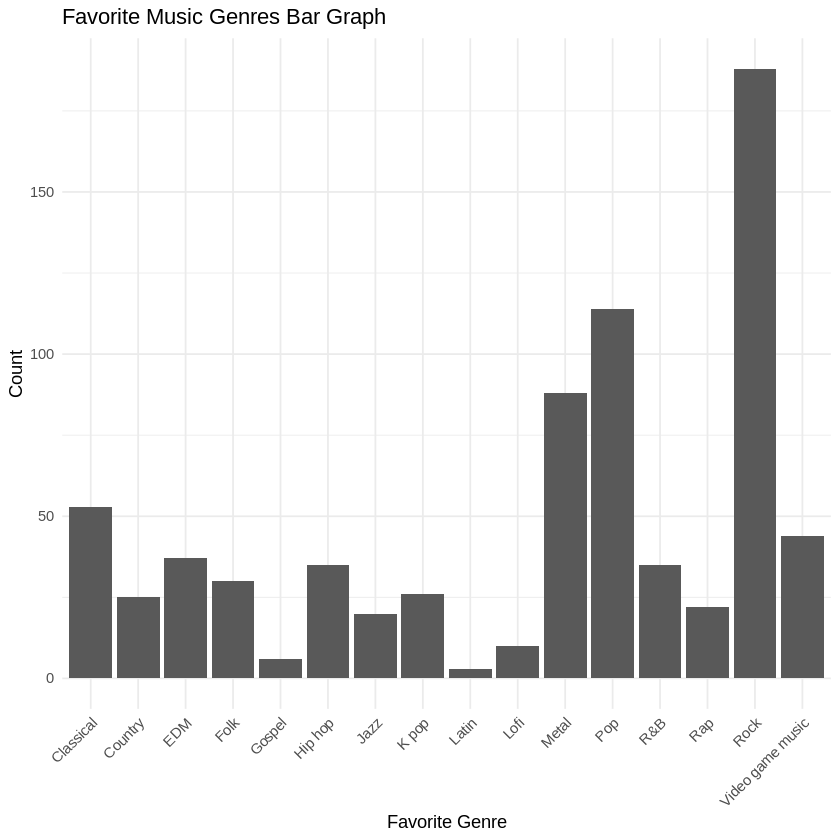

In [50]:
genre_freq_plot <- mxmh_genre_count %>%
ggplot(aes(x=fav_genre,y=count)) +
geom_bar(stat = "identity")+
theme_minimal() +
theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
labs(x = "Favorite Genre", y = "Count", title = "Favorite Music Genres Bar Graph")

genre_freq_plot

##### Since we have significant number of surveys from ***Rock*** and ***Pop***, we have decided to choose these two genres for our EDA

## Calculating Mean of the Levels of Anxiety, Depression and Insomnia in Individuals

***AWAITING JASON'S PUSH***

# Points to Remember for Hypothesis Testing and Methodology

### First Phase 
#### (Hypothesis and why/how we have we decided our null and alternative hypothesis)


1. find min of hours_per_day to prove that the minimum time our sample of population listens to music is greater **than 15 mins!!!**
2. Then claim from our researched article that their conclusion claims that **"after listening for 15 minutes to four types of music (grunge rock, classical, New Age, and designer). With grunge rock music, significant increases were found in hostility, sadness, tension, and fatigue, and significant reductions were observed in caring, relaxation, mental clarity, and vigor "**

3. Null Hypothesis would thus be: Listening to prolong time of music in Rock and Pop genre increases the levels of anxiety,insomnia, OCD, depression etc
4. Alternate Hypothesis would be that it doesn't


### Second Phase
#### (Method that we are going to use for our analysis)
5. We are going to bootstrap our data for Rock and Pop genre